Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [77]:
import numpy as np
import pandas as pd
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [79]:
df= pd.DataFrame(data, index=labels)
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


**3.** Return the first 3 rows of the DataFrame `df`.

In [9]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [11]:
print(df['animal'])
print(df['age'])

a      cat
b      cat
c    snake
d      dog
e      dog
f      cat
g    snake
h      cat
i      dog
j      dog
Name: animal, dtype: object
a    2.5
b    3.0
c    0.5
d    NaN
e    5.0
f    2.0
g    4.5
h    NaN
i    7.0
j    3.0
Name: age, dtype: float64


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [15]:
#loc is very important,used to specify the rows and columns in data, loc for alphabet, but iloc for index
#therefore we use both to select the loc of iloc
df.iloc[[3,4,8],:].loc[:, ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [16]:
df[df['visits']>3]

,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [21]:
df[df['age'].isna()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [30]:
df[(df['animal']=='cat')&(df['age']<3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [32]:
df[(df['age']>=2)&(df['age']<=4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [34]:
df.loc['f','age']=1.5
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [36]:
df['visits'].sum()

19

**12.** Calculate the mean age for each different animal in `df`.

In [38]:
#group each category of animal
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [57]:
#to append row, also we can use loc for selecting, setting and appending
df.loc['k'] = ['rabbit', 1.0, 1, 'yes']

In [51]:
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [58]:
#axis=0 is row, axis=1 is column
df= df.drop('k', axis=0)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**14.** Count the number of each type of animal in `df`.

In [63]:
#value counts, counts unique elements
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

In [66]:
#also size after group by
df.groupby('animal').size()

animal
cat      4
dog      4
snake    2
dtype: int64

**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [80]:
#no sortby, only sort_values
df= df.sort_values(['age'], ascending=False)
df= df.sort_values(['visits'], ascending=True)
df

,animal,age,visits,priority
g,snake,4.5,1,no
j,dog,3.0,1,no
a,cat,2.5,1,yes
h,cat,NaN,1,yes
i,dog,7.0,2,no
e,dog,5.0,2,no
c,snake,0.5,2,no
b,cat,3.0,3,yes
f,cat,2.0,3,no
d,dog,NaN,3,yes


In [81]:
#age is priority, then after age is prioritised, visits are done in this way
df = df.sort_values(['age', 'visits'], ascending=[False, True])
df

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,2.0,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [82]:
#apply and lambda, apply applies a function in this case lambda, like sets, if then question
df['priority']=df['priority'].apply(lambda x: True if x=='yes' else False )
df

,animal,age,visits,priority
i,dog,7.0,2,False
e,dog,5.0,2,False
g,snake,4.5,1,False
j,dog,3.0,1,False
b,cat,3.0,3,True
a,cat,2.5,1,True
f,cat,2.0,3,False
c,snake,0.5,2,False
h,cat,NaN,1,True
d,dog,NaN,3,True


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [85]:
#use replace for column, or loc can be used too
df['animal']=df['animal'].replace('snake', 'python')
df

,animal,age,visits,priority
i,dog,7.0,2,False
e,dog,5.0,2,False
g,python,4.5,1,False
j,dog,3.0,1,False
b,cat,3.0,3,True
a,cat,2.5,1,True
f,cat,2.0,3,False
c,python,0.5,2,False
h,cat,NaN,1,True
d,dog,NaN,3,True


**18.** Load the ny-flights dataset to Python

In [97]:
data= pd.read_csv('ny-flights.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20817 entries, 0 to 20816
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fl_date         20817 non-null  object 
 1   unique_carrier  20817 non-null  object 
 2   airline_id      20817 non-null  int64  
 3   tail_num        20512 non-null  object 
 4   fl_num          20817 non-null  int64  
 5   origin          20817 non-null  object 
 6   dest            20817 non-null  object 
 7   dep_time        18462 non-null  float64
 8   dep_delay       18462 non-null  float64
 9   arr_time        18412 non-null  float64
 10  arr_delay       18383 non-null  float64
 11  cancelled       20817 non-null  float64
 12  arr             18412 non-null  object 
 13  dep             18462 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 2.2+ MB
None


In [98]:
data.head()

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00


**19.** Which airline ID is present maximum times in the dataset

In [101]:
#value counts for each category, then find the max using index max, index max gives index of max value, while the 
#max gives the max value
airline_counts = data['airline_id'].value_counts()
max_airline = airline_counts.idxmax()
print("Airline ID present the maximum times in the dataset: ", max_airline)

Airline ID present the maximum times in the dataset:  20409


**20.** Draw a plot between dep_delay and arr_delay

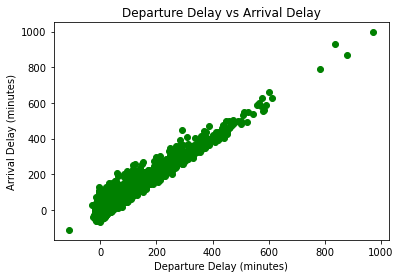

In [104]:
import matplotlib.pyplot as plt

plt.scatter(data['dep_delay'], data['arr_delay'], color='green')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Departure Delay vs Arrival Delay')
plt.show()